<a href="https://colab.research.google.com/github/alouwyck/vives_ttk_tallinn/blob/main/intro_dl/Intro_to_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

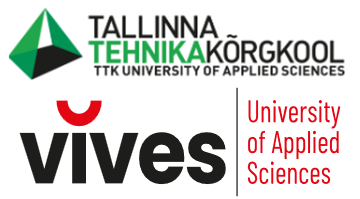<br>

**Erasmus+ Teaching Exchange**<br>
**TTK University of Applied Sciences, Tallinn, Estonia**<br>
8 - 12 December 2025<br><br>
**Guest Lecture at Centre for Sciences**<br>
by Andy Louwyck<br>
VIVES University of Applied Sciences, Kortrijk, Belgium

---



---



# **INTRODUCTION TO DEEP LEARNING WITH PYTHON**

This notebook is a brief introduction to **deep learning** with Python. We'll make use of [Keras](https://keras.io/), a popular deep learning library, which has become the high-level API of Google's [TensorFlow](https://www.tensorflow.org/). Keras allows us to easily build, train, and evaluate **artificial neural networks**.

## **What is Deep Learning?**

Deep learning sits within the wider field of artificial intelligence. Where AI is about computers making decisions, and machine learning makes those decisions based on data, deep learning goes a step further by using **neural networks**, which are layered structures that learn patterns directly from data. These networks are inspired by how the human brain connects neurons, but they are **mathematical models**, not brain simulations.

What makes deep learning effective is its ability to discover useful **representations of data** as information flows through multiple layers. With enough examples and computing power, a network can move from simple patterns to complex ones, which is why deep learning works so well for tasks like recognizing images and speech, translating text, detecting objects, and even generating new content.

In this notebook, we will use **Keras** to build and train neural networks. Keras provides a clear, high-level API that lets us define layers, choose a loss function and optimizer, train the model, and evaluate it, without getting lost in low-level details. As you follow the examples, focus on three ideas: how data is prepared and fed into the model, how the model's layers transform that data, and how training adjusts the model's parameters to improve its predictions. By the end, you'll have a practical sense of how deep learning works and how to create your own models in Keras.

## **What is an Artificial Neural Network?**

Artificial neural networks are inspired by biological brains: they also consist of **neurons** connected to each other, and exchanging signals with each other. The neurons in biological brains amplify or attenuate those signals. In an artificial neural network, the signals are the input data, which are also amplified or attenuated by the neurons, also called nodes or units. In each node the weighted sum of the input is transformed by an **activation function**. The weights used in the weighted sum are the **parameters** of the model, which is an artificial neural network in this case.

A classical neural network consists of several layers, of which the input layer receives the input data, and passes them on to the internal hidden layers, which transform the data, finally arriving at the output layer, which makes the predictions. This is called the **forward pass**.

During training of the neural net, the model **parameters** or weights are adjusted iteratively in order to minimize the **loss function**. The loss function is a measure of the difference between predicted and true labels or targets. In this step, two algorithms are involved: the **backpropagation** algorithm which adjusts the parameters jointly, and an **optimizer** that minimizes the loss function.

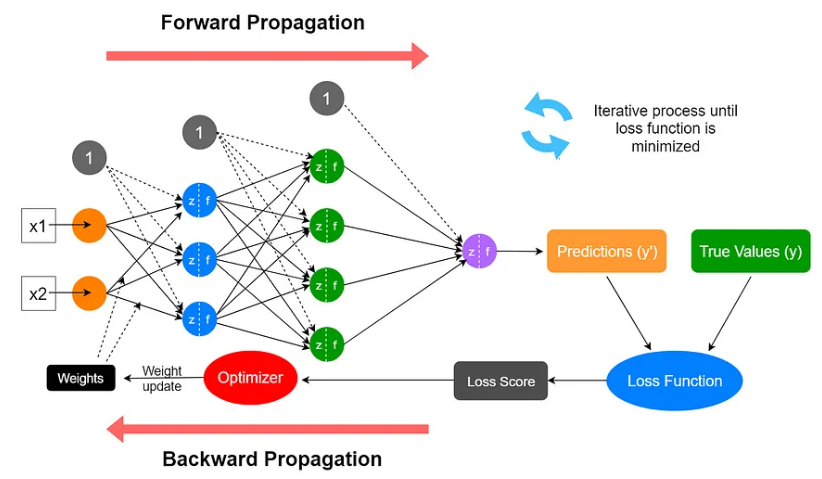

## **Python Libraries**

To get started with deep learning in Python, we'll need a few essential libraries:

- **[NumPy](https://numpy.org/)**: library for numerical computation.
- **[Matplotlib](https://matplotlib.org/)**: library for visualizing data
- **[TensorFlow](https://www.tensorflow.org/) + [Keras](https://keras.io/)**: Google's deep learning library

We import these libraries using the `import` command. It is customary to give NumPy alias `np`. From MatplotLib, we need the `pyplot` module; the convention is to import it as `plt`.

In [1]:
import numpy as np  # numeric python
import matplotlib.pyplot as plt  # python library for visualizations
from tensorflow import keras  # keras is TensorFlow's high-level API

## **Our First Neural Network**

Neural networks are very successful in **computer vision**. In particular, **convolutional networks** (CNNs or convnets) have proven to be very efficient in recognizing patterns in images. In this notebook, we will demonstrate this with a classic example of **image classification**: classifying the handwritten digits from the MNIST dataset.

First we will train a network with traditional dense layers on the dataset, after which we will try to improve the performance by using a network with convolutional layers. The neurons in such a layer do not calculate a weighted sum, but apply a mathematical operation called **convolution**. The same operation is also used, for example, to make photos blurrier or sharper. Think about applying filters in Instagram. Simply put, a convnet derives by itself the best filters from the given images, which allows for "recognizing" lines, colors, textures and objects. Based on that, it can classify the images.

Discussing the very technical details of convolution neural networks is not within the scope of this workshop. Here, we just want you to experience the power and efficiency of neural networks. The example of classifying handwritten digits could be regarded as the 'hello world' of deep learning for computer vision. So, prepare yourself and set your hardware accelerator to **GPU**! (In Google Colab you can do this in the "Edit > Notebook settings" menu).

###MNIST dataset

The [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) of handwritten digits is available with Keras and can be downloaded from `datasets.mnist`:

In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


We notice 2 things:

- The dataset is divided into a **training set** and a **test set** according to the best machine learning practices. We only train models on the training set, and afterwards evaluate them using the test set.
- **Image classification**, like all other classification tasks, is a kind of **supervised learning**. So we need not only the images but also the associated **labels**.

Let's check how many examples are in the dataset:

In [ ]:
print(f"The training set constains {len(train_images)} images")
print(f"The test set contains {len(test_images)} images")

The training set constains 60000 images
The test set contains 10000 images


A total of 70,000 images... That's not a small dataset! Let's take a look at how the dataset is constructed. As an example, let's take the fifth image from the training set:

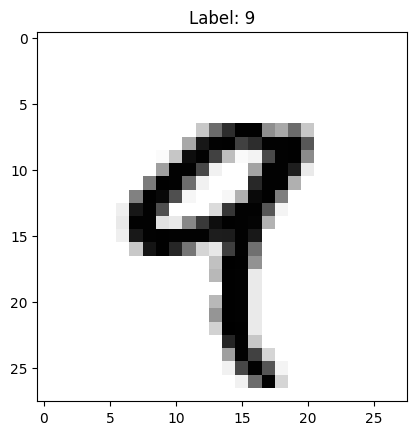

In [ ]:
digit = train_images[4]  # 5th image (index 4!)
plt.imshow(digit, cmap=plt.cm.binary)  # plot image
plt.title(f"Label: {train_labels[4]}");  # label for 5th image

It's interesting to notice that these images are actually NumPy arrays:

In [ ]:
type(digit)

numpy.ndarray

The images have a size of 28 by 28 pixels:

In [ ]:
digit.shape

(28, 28)

They are black and white images, so there is only one channel for the gray scale. RGB images, for instance, have three channels: one for red (R), one for blue (B), and one for green (G). These images would be 3D arrays. The data type of the elements is `uint8`, which stands for unsigned integer of 8 bits:

In [ ]:
digit.dtype

dtype('uint8')

Unsigned means that all elements are positive, and 8 bit implies there are $2^8$ or 256 possible values. As 0 is included, the maximum value is 255:

In [ ]:
digit.min(), digit.max()

(np.uint8(0), np.uint8(255))

Each pixel is a feature and so we need to "reshape" the images into vectors. In other words, we need to put all the pixels of an image one after the other, so that they form one long row. Then we put the different images below each other and so we get a 'table' with in the rows the data examples, here the images, and in the columns the data features, here the 28 x 28 = 784 pixels.

In addition, we must normalize the pixel values to floats between 0 and 1. We do that simply by dividing the values by 255:

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))  # reshape
train_images = train_images.astype("float32") / 255  # normalize and convert to float
test_images = test_images.reshape((10000, 28 * 28))  # reshape
test_images = test_images.astype("float32") / 255  # normalize and convert to float

We normalize data in deep learning because very large numbers can make training unstable. The optimizer, which adjusts the model to minimize the loss function, works best when the input values are on a similar scale. If the numbers vary too much, the updates can become inefficient or even diverge. **Normalization** keeps everything in a manageable range, helping the model learn faster and more reliably.

### Dense neural network

We will now first build a network consisting of 'classical' `Dense` layers. We instantiate a so-called `Sequential` model that consists of a sequence of layers. We will define 3 layers:

- The **input layer** that accepts the converted images. The input size is thus `(None, 784)`, where the `None` refers to the number of images processed during one iteration of the algorithm. That number is called the **batch size**.
- A **hidden layer** that consists of 512 neurons and applies `"relu"` (rectified linear unit) as the **activation function**.
- The **output layer** that consists of 10 neurons because we have 10 classes. There are 10 classes because there are 10 digits: from 0 to 9. So each neuron in the output layer corresponds to a digit. The `"softmax"` activation function lets each neuron in the output layer return a **probability** as output. The neuron with the highest probability indicates the digit that the model predicts.

In [ ]:
model = keras.Sequential([
 keras.layers.Dense(512, activation="relu"),  # hidden layer consisting of 512 neurons and relu as activation
 keras.layers.Dense(10, activation="softmax")  # output layer consisting of 10 neurons and softmax as activation
])

model.build(input_shape=(None, 28 * 28))  # number of neurons for the input layer
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

We see that the model consists of 407,050 parameters! Compare this to single linear regression where the algorithm only needs to derive 2 parameters: the slope and intercept of the best-fitting straight line.

Before we can begin training the model, we must first compile it. We need to specify what **loss function** the algorithm should use, and what **optimizer** it must apply to minimize that loss function. Explaining what exactly `"sparse_categorical_crossentropy"` means is out of scope, but keep in mind it is used as a loss function for classification models in which labels are represented as integers, like here.

We will also specify that we want the **accuracy** to be calculated after each epoch: it is the number of correctly classified images divided by the total number of images.

And what is an **epoch**? Well, the algorithm will repeatedly go through the entire dataset to minimize the loss function and optimize the parameters. When the algorithm has fully processed the dataset one time, it has completed one epoch.

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",  # loss function that calculates difference between predicted and true labels
    optimizer="rmsprop",  # algorithm that minimizes the loss function
    metrics=["accuracy"]  # calculate accuracy after each iteration (epoch)
  )

Now we are ready to train the model! With Keras we call the method `fit`, and we pass the data and corresponding labels to it: `train_images` and `train_labels`. So we use only the training set! We also need to specify the number of epochs and the batch size. In this case, 5 epochs will suffice and we let the algorithm process 128 images at once.

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128);  # training the model using the training set

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8736 - loss: 0.4314
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9658 - loss: 0.1170
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9779 - loss: 0.0739
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9847 - loss: 0.0512
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9895 - loss: 0.0365


The model achieves a very high accuracy of almost 99%! But does it perform as well on the test set?

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)  # evaluate model using the test set
print(f"accuracy on the test set: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9761 - loss: 0.0805
accuracy on the test set: 0.9793999791145325


The accuracy on the test is also very high! So that looks good!

Should the accuracy of the test set be much lower, our model would suffer from **overfitting**. Actually, it is best practice to use a third set to detect overfitting: the validation set. In that case, the loss (and accuracy) is calculated during training for both the validation set and the training set after each epoch. From the moment the loss of the training set keeps decreasing, while that of the validation set does not or even starts to increase, we need to stop. For this example, we figured out in advance that we should stop after about 5 epochs, and therefore, we did not validate the model.

Since overfitting is a fundamental problem in machine learning and deep learning, several regularization techniques are available to avoid it! However, explaining these techniques is not within the scope of this lecture.

Let us now check whether the neural network effectively recognizes a single handwritten digit. We take a random image from the test set and pass it to method `predict`. Of course, we also need to reshape this image into a long row of pixels:

In [ ]:
digit = test_images[666]  # test image with index 666

probs = model.predict(digit.reshape(1, -1))  # predict returns 10 probabilities
probs[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


array([6.0901630e-07, 8.9015876e-04, 1.5431200e-05, 1.0733279e-04,
       5.9443380e-07, 1.4316532e-06, 7.1235577e-09, 9.9863392e-01,
       3.7030979e-05, 3.1338877e-04], dtype=float32)

We get 10 probabilities as output indeed. So that's 10 numbers between 0 and 1 that we have to interpret as percentages. We see the eighth element is the largest number. Since we start from digit 0, the eighth element corresponds to digit 7, which has the highest probability:

In [ ]:
prob = np.max(probs) * 100  # largest probability
n = np.argmax(probs)  # index (= digit) corresponding to the largest probability
print(f"The neural network is for {prob:.2f} % sure the digit is {n}!")

The neural network is for 99.86 % sure the digit is 7!


Let's display the test image and check if the digit really looks like a 7:

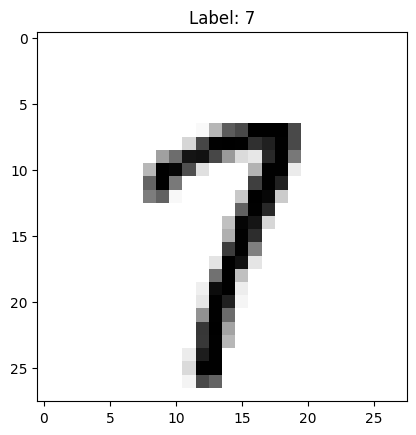

In [ ]:
plt.imshow(digit.reshape((28, 28)), cmap=plt.cm.binary)  # plot test image
plt.title(f"Label: {test_labels[666]}");  # label of the test image

That looks like a seven indeed!

### Convolutional neural network

In theory, a convnet or CNN performs even better than a `classical` network with dense layers. Let's check that out using the following model that consists of 3 `Conv2D` layers, each separated by a `MaxPooling2D` layer. The first layers apply the convolutional "filters", the second perform some kind of compression. Discussing in detail how these layers work is out of scope.

Unlike the previous model, we don't have to reshape the input images into a long row of pixels: because we are applying these "filters", the images should remain rectangular. Hence, the input shape of the input layer is 28 by 28. The number of color channels is also taken into account, but since we are dealing with black and white images, that number is 1.

The output layer is the same as the one in our previous model: a `Dense` layer with 10 neurons, and the softmax function that will give probabilities as output. The `Flatten` layer that comes just before the output layer has the sole function of converting the `rectangular` output of the last convolutional layer to 1 long row, which can be passed to the last `Dense` output layer.

In [ ]:
model = keras.Sequential([
  keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
  keras.layers.Flatten(),
  keras.layers.Dense(10, activation="softmax")  # output layer consisting of 10 neurons and softmax as activation
])

model.build(input_shape=(None, 28, 28, 1))  # input consists of images of 28 x 28 pixels en 1 color channel
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

Now we compile the model in the same way as the previous model:

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",  # loss function
    optimizer="rmsprop",  # optimizer
    metrics=["accuracy"]  # accuracy as metric
  )

Before we can start training the model, we must "reshape" the training and test set to shape `(60000, 28, 28, 1)` and `(10000, 28, 28, 1)`, respectively:

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

We are ready now to train the model. Again, we take 5 epochs, and this time, set the batch size to 64:

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=64);

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 58ms/step - accuracy: 0.8772 - loss: 0.3908
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 80ms/step - accuracy: 0.9848 - loss: 0.0480
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 77ms/step - accuracy: 0.9896 - loss: 0.0331
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 68s 72ms/step - accuracy: 0.9934 - loss: 0.0224
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 71ms/step - accuracy: 0.9945 - loss: 0.0170


We already achieved a very high accuracy using the previous neural network, but the convnet performs even slightly better!

And what is its accuracy on the test set?

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"accuracy on the test set: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9905 - loss: 0.0287
accuracy on the test set: 0.992900013923645


That accuracy is also better!

Finally, we test the new model on a test image. We may not forget to add an extra dimension, also called axis. For example, we can do this as follows:

> `digit = digit[np.newaxis, :, :]`

In [ ]:
digit = test_images[666]  # test image with index 666
probs = model.predict(digit[np.newaxis, :, :])  # add extra dimension!
prob = np.max(probs) * 100
n = np.argmax(probs)
print(f"The convnet is for {prob:.2f} % sure that the digit is {n}!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
The convnet is for 100.00 % sure that the digit is 7!


Nice! After rounding the probability, it turns out the model is 100% sure our digit is 7!

## **Tensors and Tensor Operations**

Now that we have discussed a first neural network, it's time to dive deeper into the **mathematical building blocks** of deep learning: **tensors and tensor operations**. These structures form the "gears" of neural networks, powering all computations. Tensors are **multi-dimensional arrays** that extend the concepts of scalars, vectors, and matrices to higher dimensions. They are the foundation for data representation and manipulation in deep learning and form the backbone of frameworks such as TensorFlow and PyTorch. The operations performed on tensors are called tensor operations and they are highly efficient and enable complex calculations. By exploring these concepts through **NumPy**, which stands for numerical Python, you will gain a solid understanding of how neural networks actually work under the hood.

### Tensors

In NumPy, tensors are represented as `ndarray` objects, which stands for n-dimensional array. We can simply create a NumPy array by passing a list to `np.array`:

In [ ]:
a = np.array([1, 2, 3])
print(a)
print(type(a))

[1 2 3]
<class 'numpy.ndarray'>


A NumPy array is characterized by the following **attributes**:
- `ndim`: integer indicating the number of dimensions or axes, also called the *rank* of the array;
- `shape`: tuple containing the number of elements in each dimension or along each axis;
- `size`: integer indicating the total number of elements;
- `dtype`: the data type of the elements.

In [ ]:
print("ndim:", a.ndim)
print("shape:", a.shape)
print("size:", a.size)
print("dtype:", a.dtype)

ndim: 1
shape: (3,)
size: 3
dtype: int64


As we see, array `a` is one-dimensional and has three 64-bit integer elements. A one-dimensional array is called a **vector**. How do we create a two-dimensional array, called a **matrix**?

In [ ]:
M = np.array([[1, 2, 3],   # row 1
              [4, 5, 6]],  # row 2
             dtype=float)  # dtype
print(M)

[[1. 2. 3.]
 [4. 5. 6.]]


We simply pass a list of lists to `np.array`, where each sublist represents a row in the matrix. By passing a `dtype` argument, we may define the datatype of the elements. Here, the elements would be integers by default, but by setting `dtype` to `float`, they are converted to double-precision floating point numbers:

In [ ]:
print("ndim:", M.ndim)
print("shape:", M.shape)
print("size:", M.size)
print("dtype:", M.dtype)

ndim: 2
shape: (2, 3)
size: 6
dtype: float64


We see matrix `M` indeed has two dimensions or axes, and the `shape` attribute indicates how many elements each dimension has. The convention is that the number of rows is the first axis, whereas the number of columns is the second axis. So in case of a 2D matrix the shape attribute is `(nrow, ncol)`.

Can we have arrays with zero dimensions? Yes! They are called **scalars** as they contain one element only:

In [ ]:
s = np.array(np.pi)
print("scalar s:", s)
print("ndim:", s.ndim)
print("shape:", s.shape)
print("size:", s.size)
print("dtype:", s.dtype)

scalar s: 3.141592653589793
ndim: 0
shape: ()
size: 1
dtype: float64


We see that `ndim` is `0` indeed, and consequently, `shape` is an empty tuple! There is, however, one element in `s`, which is indicated by `size`.

And how about multi-dimensional arrays? Well, they are created by passing nested lists to `np.array`:

In [ ]:
N = np.array([
              # first matrix
              [[1, 2, 3],   # row 1
               [4, 5, 6]],  # row 2
              # second matrix
              [[7, 8, 9],   # row 1
               [0, 0, 0]]   # row 2
              ])
print(N)

[[[1 2 3]
  [4 5 6]]

 [[7 8 9]
  [0 0 0]]]


Array `N` is three-dimensional:

In [ ]:
print("ndim:", N.ndim)
print("shape:", N.shape)
print("size:", N.size)
print("dtype:", N.dtype)

ndim: 3
shape: (2, 2, 3)
size: 12
dtype: int64


If we look at the `shape` attribute, we see we have created two matrices of two rows and three columns indeed! The figure below shows how n-dimensional arrays and their axes should be visualized:

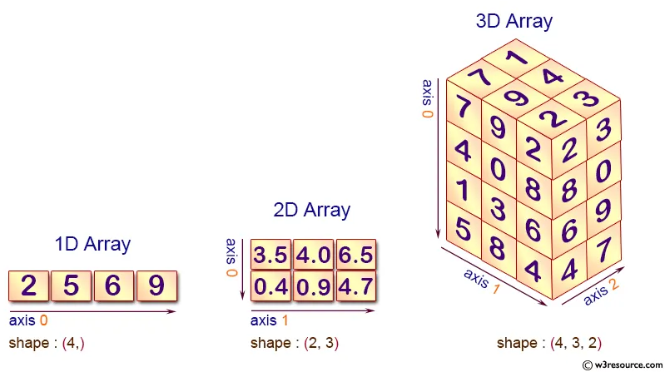

Typing all the elements and putting them into nested lists each time we want to create an array can be cumbersome. Fortunately, NumPy provides functions to create **special arrays**:

In [ ]:
Z = np.zeros((2, 2, 3))     # all zeros
O = np.ones((4, 5))         # all ones
I = np.eye(3)               # identity matrix
D = np.diag([1, 3, 5])      # diagonal matrix
R = np.random.rand(3, 4)    # random matrix

for a in [Z, O, I, D, R]:
    print(a)
    print()

[[[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]]

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

[[1 0 0]
 [0 3 0]
 [0 0 5]]

[[0.69724211 0.37933591 0.00530439 0.99423445]
 [0.35455716 0.64141923 0.74026701 0.86136823]
 [0.82105559 0.74844972 0.82097431 0.58958543]]



**Selecting array elements** can be done in the same way elements are retrieved from (nested) lists:

In [ ]:
R[0][1]  # first row, second column

np.float64(0.3793359079503651)

But there is more convenient way that gives the same result:

In [ ]:
R[0, 1]

np.float64(0.3793359079503651)

And of course, we may select more than one element or subarrays from an array:

In [ ]:
R[-1, :]  # last row

array([0.82105559, 0.74844972, 0.82097431, 0.58958543])

In [ ]:
R[:, 0]  # first column

array([0.69724211, 0.35455716, 0.82105559])

In [ ]:
R[1:, 1:-1]  # all rows except for the first, and all columns except for the first and the last

array([[0.64141923, 0.74026701],
       [0.74844972, 0.82097431]])

The colon `:` in expressions like `R[-1, :]` is called **slicing** in Python and NumPy. Slicing is a technique to select a subset of elements from an array by specifying a range of indices, using the syntax `[start:stop:step]`. In multi-dimensional arrays, the colon can be used to select all elements along a specific axis. For example, `R[-1, :]` means "select the last row and all columns".

### Tensor operations

So far, NumPy arrays seem to have no real additional benefits as they are nothing more than nested lists. However, working with NumPy arrays is very powerful as they allow for **vectorized expressions**. These expressions make it possible to perform element-wise operations on entire arrays or matrices, eliminating the need for explicit loops. They take advantage of NumPy's optimized C-based backend to efficiently perform operations on large datasets. When you apply a function or operation to a NumPy array, it automatically applies the operation to each element of the array, resulting in a new array with the same shape. This makes it both more concise and computationally efficient compared to traditional iterative operations. Let's illustrate this with an example:

In [ ]:
from time import time  # we need this to time the calculations

# a very large matrix containing one million elements equal to 1
X = np.ones((1000, 1000))

# now we want to multiply each element by 2
start = time()
for irow in range(X.shape[0]):
    for icol in range(X.shape[1]):
        X[irow, icol] *= 2
dt_loop = time() - start
print('loop:', dt_loop, 'sec')

# the vectorized expression without loop
X = np.ones((1000, 1000))
start = time()
X *= 2
dt_vect = time() - start
print('vectorized:', dt_vect, 'sec')

# compare both execution times
print(f'vectorized expressoin is {dt_loop / dt_vect:.1f} times faster!')

loop: 0.4156334400177002 sec
vectorized: 0.00098419189453125 sec
vectorized expressoin is 422.3 times faster!


We see the vectorized expression is more than 400 times faster!

So all **elementary arithmetic operations** are vectorized in NumPy, which may be useful in the creation of special arrays:

In [ ]:
n = 3
A = 10 * np.ones((n, n))      # 3x3 matrix with constant elements equal to 10
B = 2 * np.random.rand(n, n)  # 3x3 matrix with numbers between 0 and 2
C = 5 * np.eye(n)             # 3x3 diagonal matrix with nonzero element equal to 5

print(A)
print("\n+\n")
print(B)
print("\n+\n")
print(C)
print("\n=\n")
print(A + B + C)

[[10. 10. 10.]
 [10. 10. 10.]
 [10. 10. 10.]]

+

[[0.15201668 1.07957187 0.63105596]
 [1.19768113 0.79545292 1.02796541]
 [1.94595514 0.10016549 0.20928571]]

+

[[5. 0. 0.]
 [0. 5. 0.]
 [0. 0. 5.]]

=

[[15.15201668 11.07957187 10.63105596]
 [11.19768113 15.79545292 11.02796541]
 [11.94595514 10.10016549 15.20928571]]


We see that it is also possible to sum arrays of the same shape. If we use the `*` operator for multiplication, then NumPy performs **element-by-element multiplication**:

In [ ]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])
B = np.array([[10, 10, 10],
              [20, 20, 20]])
print(A)
print('\n*\n')
print(B)
print('\n=\n')
print(A * B)  # element-by-element multiplication

[[1 2 3]
 [4 5 6]]

*

[[10 10 10]
 [20 20 20]]

=

[[ 10  20  30]
 [ 80 100 120]]


As we know, there is also **[matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication)**! In NumPy this can be performed by applying function `dot`:

In [ ]:
np.dot(A, B.T)

array([[ 60, 120],
       [150, 300]])

Recall that the number of columns in `A` must be equal to the number of rows in `B`, which is why we have **transposed** the second matrix, or `B.T`. As the shape of matrix `A` is 2x3, and the shape of the transpose of matrix `B` is 3x2, the resulting matrix has shape 2x2. If we transpose matrix `A` instead of matrix `B`, we get a 3x3 matrix as result:

In [ ]:
np.dot(A.T, B)

array([[ 90,  90,  90],
       [120, 120, 120],
       [150, 150, 150]])

**Mathematical functions** available in NumPy are also vectorized:

In [ ]:
v = np.array([10, 100, 1000, 10_000, 100_000])
np.log10(v)

array([1., 2., 3., 4., 5.])

In [ ]:
x = np.pi / 4 * np.arange(7)  # numpy equivalent of range
np.sin(x)

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00])

It may be useful in some cases to **reshape arrays** using functions or methods `flatten`, `squeeze` or `reshape`:

In [ ]:
A = np.array([range(4), range(4), range(4)])  # 3x4 matrix
A.flatten()  # flatten the array to 1D vector

array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3])

In [ ]:
A.reshape((2, 6))  # reshape to 2x6 matrix

array([[0, 1, 2, 3, 0, 1],
       [2, 3, 0, 1, 2, 3]])

In [ ]:
v = np.arange(1, 6)  # 1D vector
print(v)
print()
c = v[:, np.newaxis]  # add extra dimension
print(c)
print()
print(c.squeeze())  # squeeze c = omit singleton dimensions

[1 2 3 4 5]

[[1]
 [2]
 [3]
 [4]
 [5]]

[1 2 3 4 5]


Finally, we briefly discuss **broadcasting** in NumPy. It is a mechanism that allows arrays with different shapes to be combined or operated upon together, even if their shapes don't match exactly. NumPy automatically adjusts the dimensions of the smaller array to make the operation possible, making it more convenient and efficient for element-wise operations on arrays of different shapes. Actually, we've already encountered broadcasting when we added a number to an array or multiplied an array by a number. But broadcasting also applies to matrices:

In [ ]:
A = np.array([np.zeros(3),
              10 * np.ones(3),
              20 * np.ones(3),
              30 * np.ones(3)])  # 4x3 matrix
b = np.arange(1, 4)  # 3 element vector
print(A)
print('\n+\n')
print(b)
print('\n=\n')
print(A + b)  # outcome is also 4x3

[[ 0.  0.  0.]
 [10. 10. 10.]
 [20. 20. 20.]
 [30. 30. 30.]]

+

[1 2 3]

=

[[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]


We see that vector `b`, which contains 3 elements, is broadcasted to a 4x3 matrix so it can be added to matrix `A`. It is as if vector `b` is 'stretched' by 'repeating' it 4 times:

In [ ]:
np.tile(b, (4, 1))  # 4x 'repeating' vector b along the row axis

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

The figure below visualizes very clearly what happens:

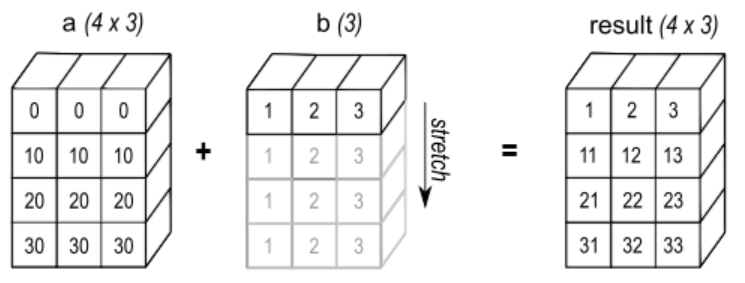

Obviously, broadcasting is only possible if the shapes of the arrays that are involved are compatible. If vector `b` has 4 elements, then the broadcasting does not work, and a `ValueError` is thrown!

In [ ]:
A = np.ones((3, 2))  # 3x2 matrix
b = np.ones(4)  # 4 element vector
try:
    print(A + b)
except ValueError as error:
    print(error)

operands could not be broadcast together with shapes (3,2) (4,) 


Now that our NumPy crash course is complete, let's explore gradient-based optimization, the engine under the hood of neural networks!

## **Gradient-Based Optimization**

In this section, we will explore **how neural networks are trained** using gradient-based optimization. We start with a simple linear regression problem on energy usage data, using the least squares method to find the optimal solution. Then, we will see how deep learning approaches the same problem numerically by applying the gradient descent algorithm to minimize the loss function. Finally, we will generalize this idea to complex, multi-layered neural networks, without diving into technical or mathematical details. This will give you an intuitive understanding of how neural networks learn from data.

### Simple linear regression

Consider the following measurements of energy usage $E$ (kWh) as a function of time $t$ (h):

| Time (hours) | Energy Usage (kWh) |
|--------------|-------------------|
| 1            | 0.55              |
| 2            | 1.03              |
| 3            | 1.41              |
| 4            | 2.03              |
| 5            | 2.51              |
| 6            | 2.92              |
| 7            | 3.62              |
| 8            | 4.05              |
| 9            | 4.49              |
| 10           | 5.12              |


Let's assign these measurements to NumPy arrays and make a **scatter plot** to visualize the **data**:

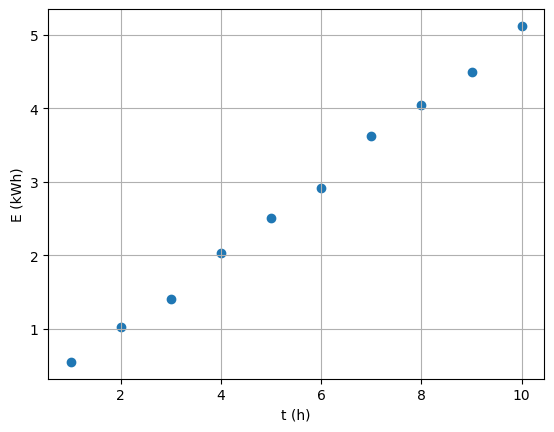

In [2]:
t = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
E = np.array([0.55, 1.03, 1.41, 2.03, 2.51, 2.92, 3.62, 4.05, 4.49, 5.12])

plt.scatter(t, E);
plt.grid();
plt.xlabel('t (h)');
plt.ylabel('E (kWh)');

Now we want to **predict** the energy usage after 11 hours. A first visual inspection reveals that the energy usage is approximately half of the time value:

> $\hat{E} = P \cdot t$

where $P=0.5$.

Quantity $P$ is the power (kW), and $\hat{E}$ is the predicted energy usage.

This equation is the **model** that we will use to make predictions. In this case, it is easy to calculate that the predicted energy usage after 11 hours is 5.5 kWh when the power is 0.5 kW.

The equation represents a straight line through the origin. Let's add this line to the scatter plot:

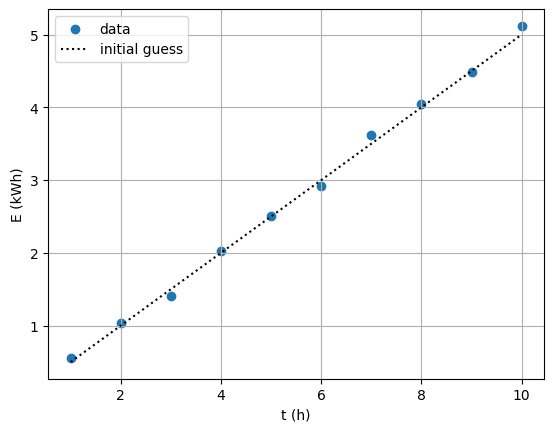

In [3]:
P_guess = 0.5
E_guess = P_guess * t

plt.scatter(t, E, label='data');
plt.plot(t, E_guess, 'k:', label='initial guess');
plt.grid();
plt.xlabel('t (h)');
plt.ylabel('E (kWh)');
plt.legend();

This is already a very close fit. But is it the **best fitting line**? By 'best fitting', we mean the line that minimizes the difference between the actual data points and the predicted values:

> $\epsilon_i = E_i - \hat{E}_i = E_i - P \cdot t_i$

with $\epsilon$ the **residual** or error, and subscript $i$ referring to the $i$-th measurement.

In statistics, this is usually found using the least squares method, which makes the sum of the squared errors $L$ as small as possible:

> $L = \sum_i \epsilon_i^2$

In general, the sum of squared errors is called the **loss function**. The squared errors are used because we want to prevent positive and negative errors from canceling each other out, ensuring that all errors contribute positively to the total error measurement.

To **minimize the loss function** $L$, we need to determine the optimal value for **parameter** $P$. In mathematics, this is achieved by setting the partial derivative of $L$ with respect to $P$ to zero:

> $\dfrac{\delta L}{\delta P} = 0$

By using the chain rule and other basic differentiation rules, we can express the partial derivative as a function of $P$:

> $\dfrac{\delta L}{\delta P}$

> $= \sum_i 2 \epsilon_i \cdot -t_i$

> $= 2 \sum_i (E_i - Pt_i)\cdot -t_i$

> $= 2 P \sum_i t_i^2 - 2 \sum_i E_i t_i$

> $= 0$

Solving this equation for $P$ finally gives an expression to calculate the optimal value $P$:

> $P = \dfrac{\sum_i E_i t_i}{\sum_i t_i^2}$

Using a vectorized NumPy expression, this is straightforward:

In [4]:
P_optimal = np.sum(E * t) / np.sum(t ** 2)
print('The optimal value for P is', P_optimal)

The optimal value for P is 0.5048831168831168


We observe that our initial guess of 0.500 for $P$ is very close to the optimal value of 0.505.

Let's visualize this result:

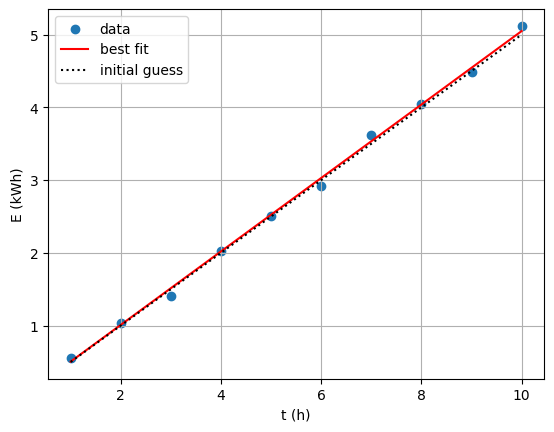

In [5]:
E_pred = P_optimal * t
plt.scatter(t, E, label='data');
plt.plot(t, E_pred, 'r-', label='best fit')
plt.plot(t, E_guess, 'k:', label='initial guess');
plt.grid();
plt.xlabel('t (h)');
plt.ylabel('E (kWh)');
plt.legend();

We observe that the best fitting line almost perfectly overlaps with the initially guessed line, but there is a slight deviation between them. This difference becomes evident when we predict the energy usage after 11 hours using the optimal value for the power:

In [6]:
print('The predicted energy usage after 11 hours is', P_optimal * 11, 'kWh')

The predicted energy usage after 11 hours is 5.553714285714285 kWh


Indeed, instead of exactly 5.5 kWh, we now get 5.554 kWh!

The problem we solved is a **simple linear regression** problem, where the regression line passes through the origin. The solution we derived analytically is exact.

In deep learning, the **optimizer** performs a similar task: it minimizes the loss function by finding the optimal parameter values. However, neural networks are typically much more complex and use non-linear activation functions, which makes it impossible to find an exact analytical solution. For this reason, a **numerical solution method** called **gradient descent** is used instead.

### The simplest neural net possible

Actually, the problem we solved in the previous section using the least squares method can also be approached numerically with the simplest neural network possible: **a neural network consisting of a single neuron**. This setup is illustrated in the figure below.

The neuron's input consists of the times $t$. In machine learning, this is typically called a **feature**, while in statistics, it is referred to as a predictor or independent variable, often denoted by $x$. Inside the neuron, the input $x$ is multiplied by a **weight** $w$, which corresponds to the power $P$. This is also called a model **parameter**. The output of the neuron, $\hat{y}$ (or $y'$ in the figure), represents the **predicted** energy usage $\hat{E}$. The actual values $y$ are known as the **target** or dependent variable and correspond to the measured energy usage $E$. Because the target is given, this is a **supervised learning** problem.

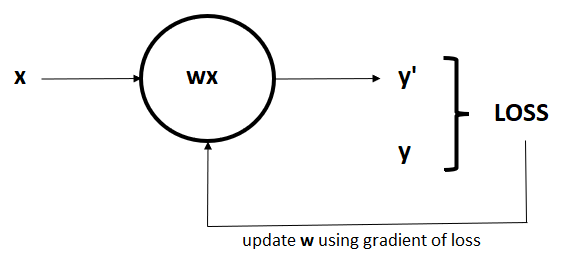

The **loss function** remains the sum of squared errors, $L$. However, instead of solving analytically, a numerical **optimizer** is used to update the weight $w$ iteratively until the loss function is minimized. The optimization algorithm responsible for this iterative minimization is called **gradient descent**. It does not yield an exact solution, but rather an **approximation** that is sufficiently close to the optimal weight value.

Gradient descent works by starting with a **random value** for the weight $w$. Then, step by step, it moves towards the minimum of the loss function. At each step, the algorithm looks at **the slope of the loss function** at the current value of $w$. If the slope is positive, the algorithm decreases $w$; if the slope is negative, it increases $w$.

This process is repeated, taking **small steps** in the direction opposite to the gradient, until the algorithm reaches a point where the loss function is minimized. In this way, gradient descent finds an **approximate solution** for the optimal weight without needing an exact analytical formula.

Let's redefine the loss function $L$ using symbols $x$, $y$, and $w$:

> $L = \sum_i \big(y_i - wx_i \big)^2$

In the previous section, we already derived the derivative of the loss function $L$ with respect to the model parameter $w$, using different symbols:

> $\dfrac{\delta L}{\delta w} = 2 w \sum_i x_i^2 - 2 \sum_i x_i y_i$


Let's translate these mathematical expressions into code:

In [7]:
x, y = t, E  # assign times t and usage E to x and y, resp.
L = lambda w: np.sum((y - w*x)**2)                 # loss function L is sum of squared errors
dLdw = lambda w: 2*w*np.sum(x**2) - 2*np.sum(x*y)  # derivative of L with respect to w

Verifying that the derivative is indeed zero at the optimal value of the weight:

In [8]:
w_optimal = P_optimal
print(f'Loss function L in w optimal: {L(w_optimal):.4f}')
print(f'Derivative of L in w optimal: {dLdw(w_optimal):.4f}')

Loss function L in w optimal: 0.0411
Derivative of L in w optimal: -0.0000


By definition, the **derivative of a function** at a given point represents the **slope of the tangent line** at that point. Let's visualize this by plotting the loss function for a range of weights and adding the tangent line at several points:

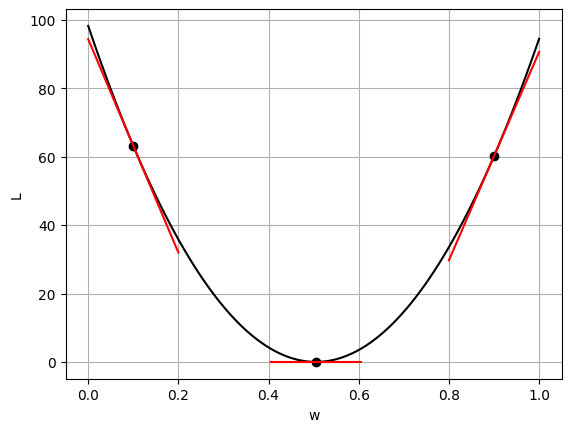

In [9]:
w_range = np.linspace(0, 1, 100)
L_range = np.array([L(w) for w in w_range])

w1, w2, w3 = 0.1, w_optimal, 0.9
L1, L2, L3 = L(w1), L(w2), L(w3)

plt.plot(w_range, L_range, 'k-');
plt.plot([w1, w2, w3], [L1, L2, L3], 'ko');
plt.grid();
plt.xlabel('w');
plt.ylabel('L');

tangent = lambda w, wi, Li: Li + dLdw(wi)*(w-wi)
for wi, Li in zip([w1, w2, w3], [L1, L2, L3]):
    w_tangent = np.array([wi-0.1, wi+0.1])
    plt.plot(w_tangent, tangent(w_tangent, wi, Li), 'r-');

We clearly see that the tangent line at the minimum of the loss function is horizontal, or in other words, that the tangent line at the minimum has no slope. Put differently, **the derivative at the minimum is zero**. This is why, in the previous section, we derived the optimal value for the power $P$ by setting the derivative of the loss function $L$ with respect to $P$ equal to zero.

At the left point, the tangent line is decreasing because the slope of the loss function goes downward, while at the right point, the tangent line is increasing because the slope of the loss function goes upward. The derivative at the left point is therefore negative, and at the right point, it is positive:

In [10]:
print(f'derivative in w = {w1} is {dLdw(w1):.4f}')
print(f'derivative in w = {w3} is {dLdw(w3):.4f}')

derivative in w = 0.1 is -311.7600
derivative in w = 0.9 is 304.2400


The **gradient descent algorithm** is quite straightforward. We start with a random value for the weight $w$, and then we iteratively update $w$ using the derivative of the loss function $L$ at $w$:

> $w_{k+1} = w_k - \alpha \dfrac{\delta L}{\delta w}$

Here, $\alpha$ is the **learning rate**, which controls the size of each step we take towards the minimum. The subscript $k$ refers to the $k$-th iteration.

This formula adjusts the weight by subtracting a fraction of the derivative, which points in the direction of steepest increase. The minus sign means that we move in the **opposite direction** of the gradient, ensuring we descend towards the minimum of the loss function. The learning rate is crucial: if it is too large, we might overshoot the minimum; if it is too small, convergence will be slow. The learning rate ensures we make steady progress without jumping over the optimal value.


The recursive formula can be easily translated into code using a `for`-loop:

In [11]:
alpha = 0.0001  # learning rate
niter = 100     # number of iterations

w_steps = np.zeros(niter) # array containing all intermediate values of w
w_steps[0] = 0.1          # initial value for w

# gradient descent algorithm
for k in range(niter-1):
    w_steps[k+1] = w_steps[k] - alpha * dLdw(w_steps[k])

print("the optimal value for w found by gradient descent is", w_steps[-1])

the optimal value for w found by gradient descent is 0.5047378060244245


By choosing an appropriate learning rate $\alpha$ and performing a sufficient number of iterations, we obtain a solution that is very close to the exact solution we previously derived analytically. We have saved the intermediate values of $w$ during the iterative process. Let's plot these values to see how gradient descent effectively approaches the minimum in small steps:

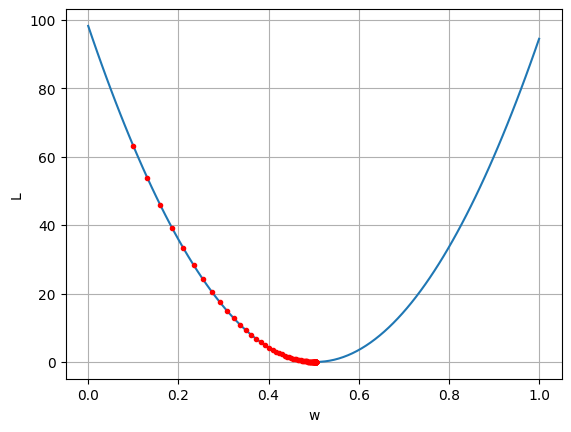

In [12]:
w_range = np.linspace(0, 1, 100)
L_range = np.array([L(w) for w in w_range])
L_steps = np.array([L(w) for w in w_steps])

plt.plot(w_range, L_range);
plt.grid();
plt.xlabel('w');
plt.ylabel('L');
plt.plot(w_steps, L_steps, 'r.');

Applying gradient descent is essentially what we mean by the **learning algorithm**: it gradually reduces the error step by step. This process is also what we refer to as **training the model**.

Below you can see the code for a Matplotlib animation that clearly visualizes the steps of the gradient descent algorithm (left plot) and the corresponding regression line that fits the data (right plot). Try starting with a different initial value `w_ini`, and experiment with the learning rate `alpha` and the number of iterations `niter`. When does it take steps that are too small, and when does it take steps that are too large, causing it to overshoot the minimum? Under which conditions does the algorithm converge to the minimum?


In [26]:
alpha = 0.0001  # learning rate
niter = 100     # number of iterations
w_ini = 0.1     # initial value for w

# import statements
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')

# initialize figure and coordinate systems
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_xlabel('w')
ax1.set_ylabel('L')
ax1.set_xlim((-0.1, 1.1))
ax1.set_ylim((-5, 105))
ax2.set_xlabel('t (h)');
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_ylabel('E (kWh)');
ax2.set_xlim((0, 11))
ax2.set_ylim((0, 6))

# the initialization function for the animation
def init():
    w_range = np.linspace(0, 1, 100)
    L_range = np.array([L(w) for w in w_range])
    ax1.plot(w_range, L_range, 'k-')
    ax1.grid()
    ax2.scatter(t, E);
    ax2.grid()

# the update function for the animation
w_steps = [w_ini]
L_steps = [L(w_steps)]
def update(i):
    if i > 0: ax2.lines[0].remove()
    ax1.plot(w_steps[-1], L_steps[-1], 'r.')
    ax1.set_title(f'w = {w_steps[-1]:.4f}')
    ax2.plot(t, t * w_steps[-1], 'r-')
    ax2.set_title(f'L = {L_steps[-1]:.4f}')
    w_steps.append(w_steps[-1] - alpha * dLdw(w_steps[-1]))  # gradient descent
    L_steps.append(L(w_steps[-1]))  # loss

# create the animation
ani = FuncAnimation(fig, update, frames=range(niter), init_func=init, blit=False, repeat=True)
plt.close()
ani

### Keras

Using Keras, we can apply exactly the same iterative method to solve the problem from the previous section.

The following code defines and trains a very simple neural network using Keras. The model is created as a `Sequential` model, which means that layers are stacked linearly and data flows through them in order. In this case, the model contains only a single layer.

The added layer is a `Dense` (fully connected) layer with exactly one neuron. Because `use_bias` is set to `0`, the neuron does not include a bias or intercept term. As a result, the model learns only a single weight. Because the input consists of one feature $x$, the model represents the function $\hat{y} = w \cdot x$, which corresponds to a linear regression model that is forced to pass through the origin.

In [27]:
# building the model
single_node = keras.Sequential()  # layered neural net

single_node.add(
    keras.layers.Dense(  # 1 dense or fully connected layer
        1,               # 1 linear unit (or neuron)
        use_bias=0       # no bias (= no intercept)
    )
)

After defining the model structure, the `compile` method configures how the model will be trained. The optimizer chosen is stochastic gradient descent (SGD), with a learning rate given by the variable `alpha` that we defined in the previous section. Recall that the learning rate controls the size of the weight updates during training. The loss function is mean squared error (MSE), which measures the average squared difference between the predicted output and the true target values. This loss function is commonly used for regression problems, and it is equal to the sum of squared errors divided by the number of data points `n`.

In [28]:
# compiling the model
single_node.compile(
    optimizer=keras.optimizers.SGD(learning_rate=alpha),  # stochastic gradient descent with learning rate alpha
    loss='mse'                                            # mean squared error as loss function
)

The `fit` method trains the model on the provided data. The input array `x` and the target array `y` are reshaped using `np.newaxis` so that they become two-dimensional arrays of shape `(n, 1)`, which is the format expected by Keras for samples with a single feature. The model is trained for 1000 iterations or epochs, meaning the entire dataset is processed 1000 times. The batch size is set equal to the number of samples `n`, so the gradient is computed using the full dataset at once. This corresponds to the gradient descent algorithm discussed and implemented in the previous section. Finally, `verbose=0` disables printed training output. The training history, including the loss values over iterations, is stored in the variable `result`.

In [29]:
# training the model
result = single_node.fit(
    x[:, np.newaxis],   # input feature x
    y[:, np.newaxis],   # target y
    epochs=1000,        # number of iterations
    batch_size=len(x),  # process entire dataset at once
    verbose=0           # no printing
);

We verify the training `result` by plotting the loss (MSE) as a function of the number of iterations:

In [ ]:
# building the model
single_node = keras.Sequential()
single_node.add(keras.layers.Dense(1, use_bias=0))
# compiling the model
single_node.compile(
    optimizer=keras.optimizers.SGD(learning_rate=alpha),
    loss='mse'
)
# training the model
result = single_node.fit(
    x[:, np.newaxis], y[:, np.newaxis],
    epochs=1000, batch_size=len(x)
);

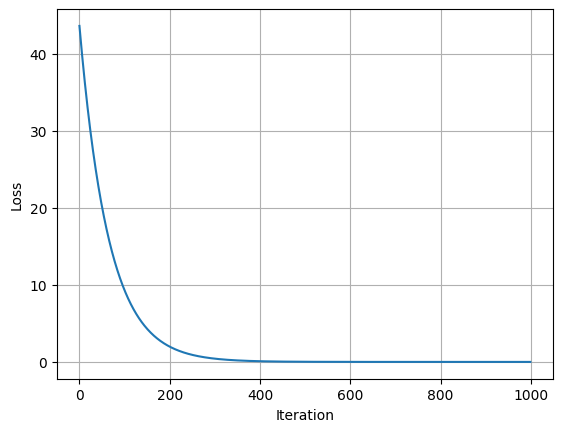

In [30]:
plt.plot(result.history['loss']);
plt.grid();
plt.xlabel("Iteration");
plt.ylabel("Loss");

We observe that the model converges to a solution that is a very close approximation of the minimum of the loss function.

Let's retrieve the optimized weight by calling the `get_weights()` method:

In [31]:
w_opt = single_node.get_weights()
print("the optimal value for w found by Keras is", w_opt[0][0].item())

the optimal value for w found by Keras is 0.5053511261940002


We indeed obtain an optimal power equal to 0.505 kW!

### Stochastic Gradient Descent and Backpropagation

When we move to more complex, **multi-layered neural networks**, the loss function becomes multi-dimensional because there is one dimension for each model parameter. The **gradient** is the generalization of the derivative to multiple dimensions; it tells us the direction of steepest increase in the loss function.

Neural networks are typically trained on very **large datasets**, which are split into smaller **batches**. For each batch, we estimate the gradient, allowing us to update the parameters step by step. This approach is called **Stochastic Gradient Descent** (SGD) because the batches are formed randomly.

To efficiently compute the gradient through the network's layers, we use a technique called **backpropagation**. Backpropagation applies the chain rule, working backwards from the output layer to the input layer, to calculate how each parameter affects the loss.

You can think of this process like navigating a **mountainous landscape** in the dark: you can't see the whole valley, but by feeling the slope beneath your feet (the gradient), you take small steps downhill (updating parameters) until you reach the lowest point (minimum loss). This is how neural networks learn from data—by gradually reducing the error, one batch at a time.

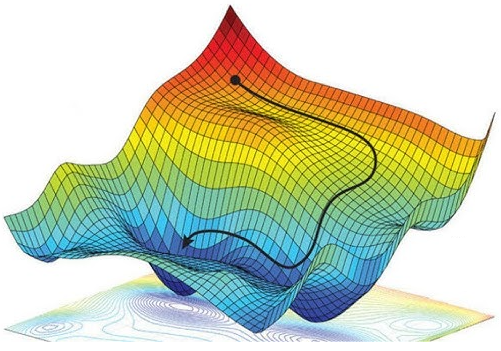

Modern deep learning libraries like **PyTorch** and **TensorFlow** make this process much easier. They automatically keep track of all the calculations in the network and figure out how to update each parameter efficiently. This automatic process is called **automatic differentiation**, or autodiff. Thanks to autodiff, we don't have to manually compute gradients or apply the chain rule ourselves. These libraries do it for us behind the scenes, making training neural networks much more accessible and less error-prone!


---



---
## **References**

- Serrano, L.G., 2021. [Grokking Machine Learning](https://www.manning.com/books/grokking-machine-learning). Manning Publication.
- Chollet, F., 2022. [Deep Learning with Python (2nd ed.)](https://www.manning.com/books/deep-learning-with-python-second-edition). Manning Publication.
- [NumPy User Guide](https://numpy.org/doc/stable/user/index.html). Consulted on Februari 18, 2024.
- Rukshan Pramoditha, 2022. [Overview of a Neural Network's Learning Process](https://medium.com/data-science-365/overview-of-a-neural-networks-learning-process-61690a502fa). Medium.
- Copilot and perplexity.ai were used to generate some of the content.

---